In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #gráficas
from sklearn.linear_model import LinearRegression #modelo de regresión lineal
from sklearn.model_selection import train_test_split #dividir datos en sets de entrenamiento y test

In [18]:
# Leer datos del archivo CSV
data = pd.read_csv('Hombres.csv', sep=';', decimal=',')
df_triplicado = pd.concat([data] * 3, ignore_index=True)
x = df_triplicado['Edad'].values.reshape((-1, 1))
y = df_triplicado['HB_POST'].values


In [19]:
x_train, x_test, y_train, y_test=train_test_split(x, y,test_size=0.1, random_state=0)
# Crear el modelo de regresión lineal
model = LinearRegression().fit(x_train, y_train)

In [20]:
x_media = np.mean(x_train)
y_media = np.mean(y_train)
x_varianza = np.var(x_train) #variación de los datos respecto a su media (desviacion^2)
y_varianza = np.var(y_train)
covarianza = np.cov(x_train.flatten(), y_train)[0][1]  # Covarianza entre x e y, relación lineal entre x e y, si covarianza>0, y aumentará cuando aumente x. Si <0, cuando una aumenta, la otra disminuye, y viceversa.
x_desviacion = np.std(x_train) #promedio de las desviaciones individuales frente a la media
y_desviacion = np.std(y_train)
coef_correlacion= np.corrcoef(x_train.flatten(), y_train)[0][1]
print(f"la media de x es {x_media} y la de y es {y_media}")
print(f"la varianza de x es {x_varianza} y la de y es {y_varianza}")
print(f"la desviación típica de x es {x_desviacion} y la de y es {y_desviacion}")
print(f"la covarianza entre x e y es de {covarianza}")
print(f"coeficiente de correlación entre x e y es de {coef_correlacion}")

la media de x es 57.15714285714286 y la de y es 13.278571428571428
la varianza de x es 120.76102040816326 y la de y es 1.361969387755102
la desviación típica de x es 10.98913192241149 y la de y es 1.167034441546222
la covarianza entre x e y es de -1.6415113871635632
coeficiente de correlación entre x e y es de -0.12616761408063795


In [21]:
# Obtener los coeficientes del modelo
r_sq = model.score(x_train, y_train)
intercept = model.intercept_
slope = model.coef_

print(f"coeficiente de determinación: {r_sq}")
#print(f"intersección: {intercept}") #b0 No son útiles en este estudio
print(f"pendiente: {slope}") #b1 

coeficiente de determinación: 0.015918266842800288
pendiente: [-0.01339887]


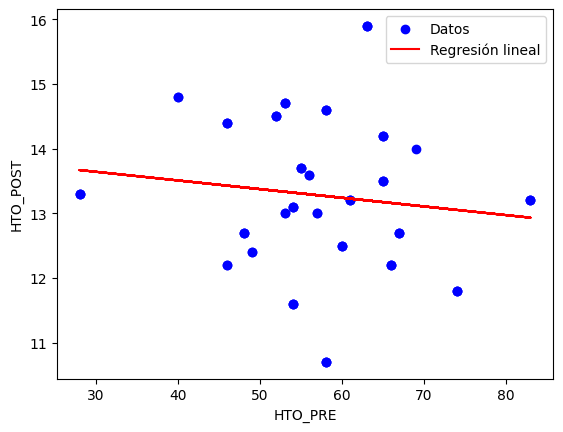

In [22]:
# Gráfica los datos y la recta de regresión
plt.scatter(x_train, y_train, color='blue', label='Datos')
plt.plot(x_train, model.predict(x_train), color='red', label='Regresión lineal')
plt.xlabel('HTO_PRE')
plt.ylabel('HTO_POST')
plt.legend()
plt.show()

In [23]:
#Predecir la respuesta de y a lo largo de los valores de x
y_pred = model.predict(x_test)
y_pred = y_pred.round(0)
print(f"los valores de edad de entrenamiento que se usan son:\n{x_test}")
print(f"predicción respuesta:\n{y_pred}")

los valores de edad de entrenamiento que se usan son:
[[69]
 [49]
 [53]
 [46]
 [40]
 [56]
 [57]
 [69]]
predicción respuesta:
[13. 13. 13. 13. 14. 13. 13. 13.]


In [24]:
""" #Predecir la respuesta de y con x del 13.8 al 17.2 (valores típicos entre hombres)
start = 13.8
end = 17.2
step = 0.2
x_new = np.arange(start, end + step, step).reshape((-1, 1))
y_new = model.predict(x_new)

print(f"predicción de nueva respuesta (pasos de 0.2):\n{y_new}")

#Predecir la respuesta de y para un valor específico de x
x_specific = np.array([15.6]).reshape(-1, 1)
y_specific = model.predict(x_specific)
print(f"predicción respuesta para x={x_specific}:\n{y_specific}") """

' #Predecir la respuesta de y con x del 13.8 al 17.2 (valores típicos entre hombres)\nstart = 13.8\nend = 17.2\nstep = 0.2\nx_new = np.arange(start, end + step, step).reshape((-1, 1))\ny_new = model.predict(x_new)\n\nprint(f"predicción de nueva respuesta (pasos de 0.2):\n{y_new}")\n\n#Predecir la respuesta de y para un valor específico de x\nx_specific = np.array([15.6]).reshape(-1, 1)\ny_specific = model.predict(x_specific)\nprint(f"predicción respuesta para x={x_specific}:\n{y_specific}") '